<a href="https://colab.research.google.com/github/serezmatik/Systemy-wspomagania-decyzji/blob/main/Gaussa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
# Data set generation
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, Nadam
from sklearn.model_selection import train_test_split

# Generate 3 dimensional dataset with 10 classes and 250 elements
def generate_dataset():
    X = []
    y = []
    means = [[3, 3, 3], [5, 5, 5], [7, 7, 7], [9, 9, 9], [1, 1, 1], [2, 2, 2], [4, 4, 4], [6, 6, 6], [8, 8, 8], [0, 0, 0]]
    covs = [[[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
            [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
    for i in range(10):
        X_class = np.random.multivariate_normal(means[i], covs[i], 25)
        X.extend(X_class)
        y.extend([i] * 25)
    return np.array(X), np.array(y)




In [152]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_dataset(X, y):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(10):
        X_class = X[y == i]
        ax.scatter(X_class[:, 0], X_class[:, 1], X_class[:, 2], label='Class {}'.format(i))
    ax.legend()
    ax.set_title('3D Visualization of Synthetic Dataset')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()


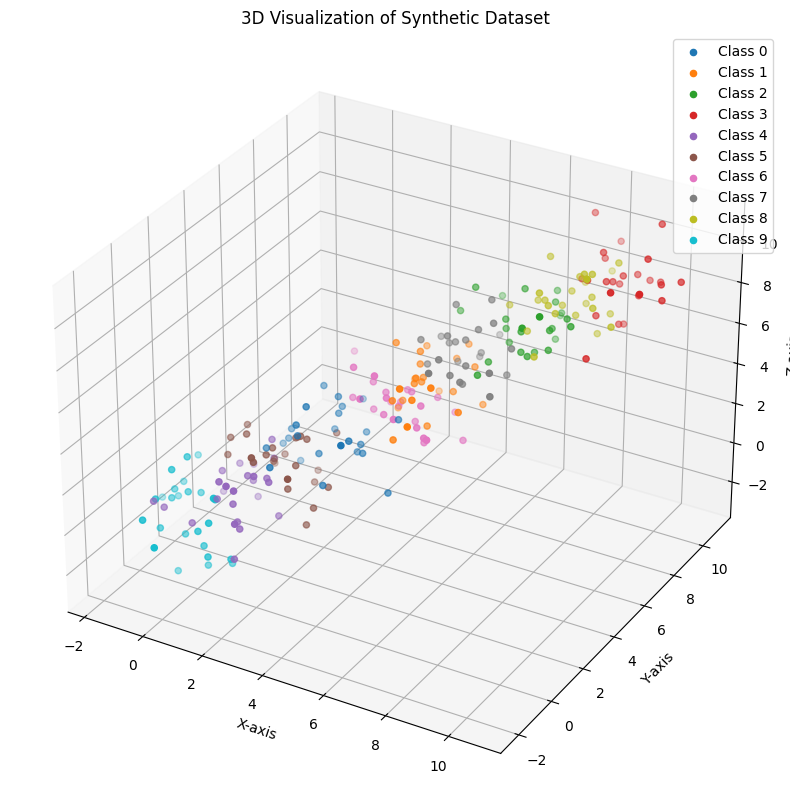

In [153]:
(x, y) = generate_dataset()
plot_dataset(x, y)

In [154]:
class Classifier:
    def __init__(self, num_layers, neurons_per_layer, activation):
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation

    def build_model(self, input_shape):
        model = Sequential()
        model.add(Dense(self.neurons_per_layer, activation=self.activation, input_shape=(input_shape,)))
        for i in range(self.num_layers - 1):
            model.add(Dense(self.neurons_per_layer, activation=self.activation))
        model.add(Dense(10, activation='softmax'))
        return model

In [155]:
def train(X, y, model, optimizer, epochs):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history

In [156]:
# Plot the training results
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_classification_results(X, y, model, num_layers, neurons_per_layer):
    y_probs = model.predict(X)
    y_pred = np.argmax(y_probs, axis=1)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(5):
        X_class = X[y == i]
        y_pred_class = y_pred[y == i]
        X_class_3d = np.column_stack((X_class, np.zeros(len(X_class)))) # add a third dimension
        ax.scatter(X_class_3d[:, 0], X_class_3d[:, 1], X_class_3d[:, 2], c=y_pred_class,
                   label='Class {}'.format(i))
    ax.legend()
    ax.set_title(f'Classification Results\n({num_layers} Layers, {neurons_per_layer} Neurons per Layer)')  # Dodanie opisu
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()

Running experiment for configuration: 2 layers, 16 neurons per layer, activation: relu
2/2 [==============================] - 0s 7ms/step - loss: 1.3675 - accuracy: 0.3200
Test Accuracy: 0.3199999928474426


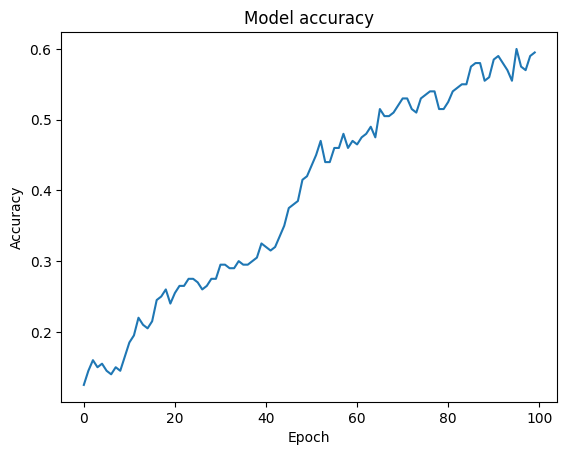


Running experiment for configuration: 3 layers, 32 neurons per layer, activation: tanh
2/2 [==============================] - 0s 8ms/step - loss: 1.1599 - accuracy: 0.4600
Test Accuracy: 0.46000000834465027


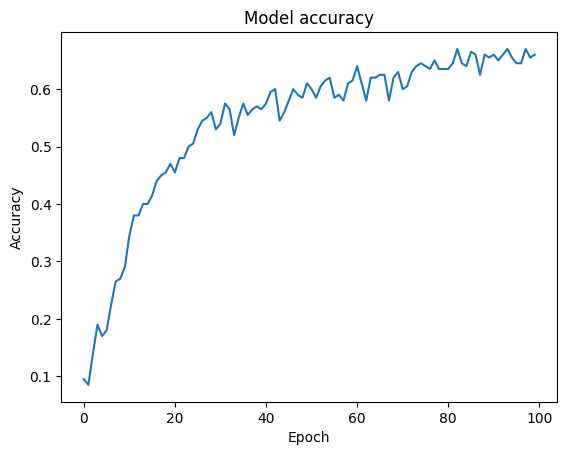


Running experiment for configuration: 4 layers, 64 neurons per layer, activation: sigmoid
2/2 [==============================] - 0s 8ms/step - loss: 1.2703 - accuracy: 0.3400
Test Accuracy: 0.3400000035762787


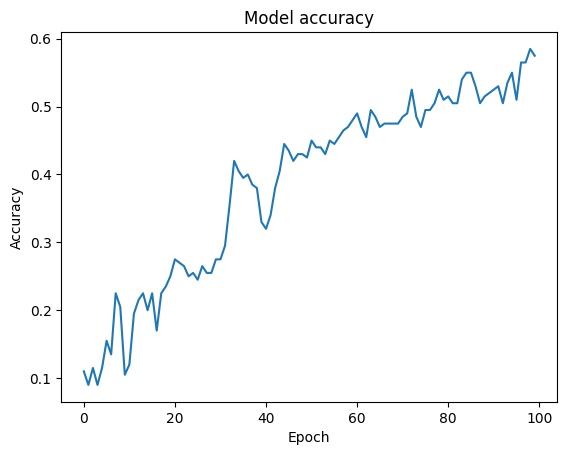


Running experiment for configuration: 2 layers, 32 neurons per layer, activation: elu
2/2 [==============================] - 0s 8ms/step - loss: 1.1288 - accuracy: 0.6000
Test Accuracy: 0.6000000238418579


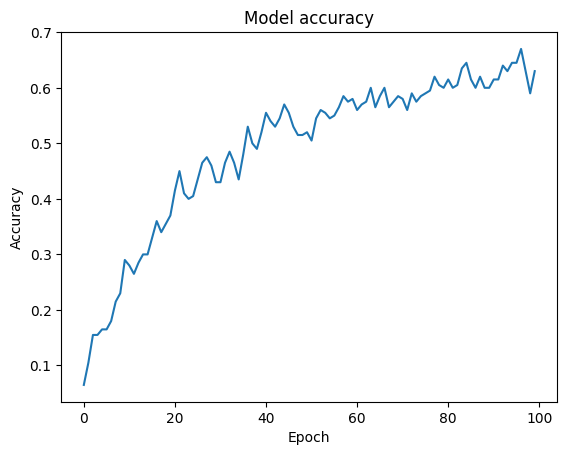


Running experiment for configuration: 3 layers, 64 neurons per layer, activation: relu
2/2 [==============================] - 0s 8ms/step - loss: 1.5477 - accuracy: 0.3200
Test Accuracy: 0.3199999928474426


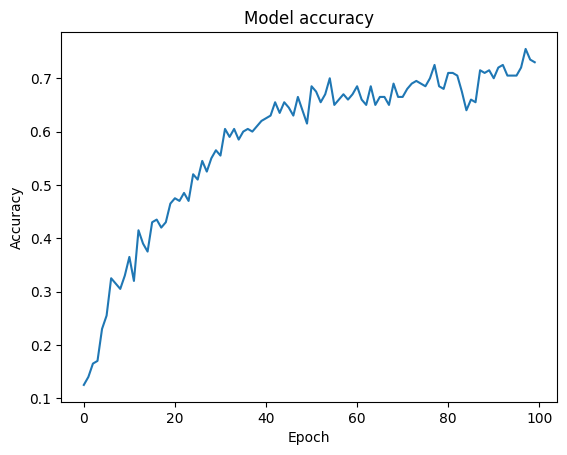

In [159]:
def experiment(num_layers=3, neurons_per_layer=32, activation='relu', epochs=100):
    X, y = generate_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    classifier = Classifier(num_layers, neurons_per_layer, activation)
    model = classifier.build_model(input_shape=3)

    optimizer = Adam(learning_rate=0.001)
    history = train(X_train, y_train, model, optimizer, epochs)

    # Ewaluacja modelu na zbiorze testowym
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")

    # Wykres dokładności treningu
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()
# Wywołanie eksperymentu dla różnych konfiguracji
configurations = [
    (2, 16, 'relu'),
    (3, 32, 'tanh'),
    (4, 64, 'sigmoid'),
    (2, 32, 'elu'),
    (3, 64, 'relu')
]

for config in configurations:
    num_layers, neurons_per_layer, activation = config
    print(f"Running experiment for configuration: {num_layers} layers, {neurons_per_layer} neurons per layer, activation: {activation}")
    experiment(num_layers=num_layers, neurons_per_layer=neurons_per_layer, activation=activation)
    print()

Konfiguracja nr 4 (2 warstwy, 32 neurony na warstwę, funkcja aktywacji ELU) osiągnęła najwyższą dokładność na zbiorze testowym, wynoszącą 0.60.

Wzrost liczby trenowań (epok) może prowadzić do zwiększenia dokładności modelu, ale tylko do pewnego momentu. Po pewnej liczbie epok model może zacząć przeuczać się na zbiorze treningowym, co może prowadzić do pogorszenia wyników na zbiorze testowym. Dlatego ważne jest znalezienie optymalnej liczby epok, która zapewnia najlepszą dokładność na zbiorze testowym.

Zmiana współczynnika uczenia (learning rate) również może wpływać na szybkość osiągnięcia dobrych wyników. Zbyt duży learning rate może prowadzić do rozbieżności modelu, podczas gdy zbyt mały learning rate może spowolnić proces uczenia. Optymalny learning rate może być różny dla różnych zestawów danych i architektur sieci, dlatego warto eksperymentować, aby znaleźć najlepszą wartość.

**Odpowiedzieć na pytania:**
1.	Dlaczego wyniki trenowania dają lepsze rezultaty niż w poprzednim zbiorze. Uzasadnić odpowiedź.
*Wyniki trenowania na zmodyfikowanym zbiorze trenującym są lepsze niż na poprzednim zbiorze z kilku powodów. Po pierwsze, zmodyfikowany zbiór trenujący jest bardziej "rozróżnialny", ponieważ wykorzystuje podział Gaussa do generowania danych. Oznacza to, że dane z różnych klas są bardziej oddzielone od siebie, co ułatwia modelowi naukę i klasyfikację. Dodatkowo, zwiększenie liczby epok trenowania pozwala modelowi lepiej dostosować się do tych bardziej złożonych danych.*
2.	Czy architektura sieci ma znaczny wpływ na jakość klasyfikacji.
*Tak, architektura sieci ma znaczący wpływ na jakość klasyfikacji. Wybór liczby warstw, liczby neuronów w każdej warstwie oraz funkcji aktywacji może znacznie wpłynąć na zdolność modelu do rozpoznawania i klasyfikowania wzorców w danych. Optymalna architektura sieci zależy od konkretnej aplikacji i charakterystyki danych.*
3.	Czy szybkość trenowania ma wpływ na jakość klasyfikacji.
*Tak, szybkość trenowania ma wpływ na jakość klasyfikacji. Zbyt szybkie trenowanie może prowadzić do przeuczenia, co oznacza, że model dostosowuje się zbyt dokładnie do danych treningowych i nie generalizuje dobrze na nowe dane. Zbyt wolne trenowanie może prowadzić do niskiej dokładności, ponieważ model nie zdąży nauczyć się wystarczająco dużo informacji. Optymalna szybkość trenowania (learning rate) zależy od danych i architektury sieci.*
4.	Czy rodzaj optymalizatora ma wpływ na jakość klasyfikacji.
*Tak, rodzaj optymalizatora ma wpływ na jakość klasyfikacji. Różne optymalizatory mają różne strategie aktualizacji wag sieci w trakcie uczenia. Optymalizator może pomóc modelowi uniknąć problemów takich jak zatrzymanie w minimum lokalnym czy oscylacje podczas uczenia. Wybór odpowiedniego optymalizatora zależy od konkretnej sytuacji i może znacząco wpłynąć na zdolność modelu do osiągania dobrych wyników.*